In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta, date
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [19]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True) 
df['DOB'] =pd.to_datetime(df['DOB'].str[:-2] + '19' + df['DOB'].str[-2:])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

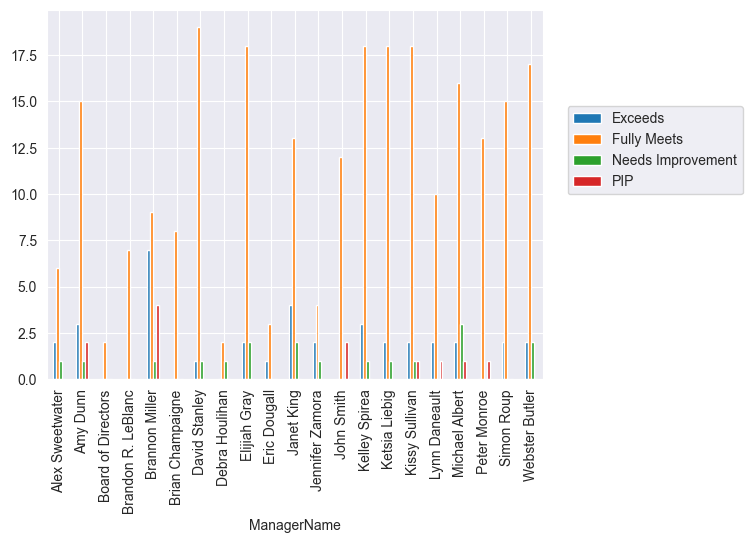

In [20]:
Manager_PerformanceScore=pd.crosstab(df['ManagerName'], df['PerformanceScore'])
axes1 = Manager_PerformanceScore.plot.bar()
axes1.legend(loc=(1.05,0.5))

odp.

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [21]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

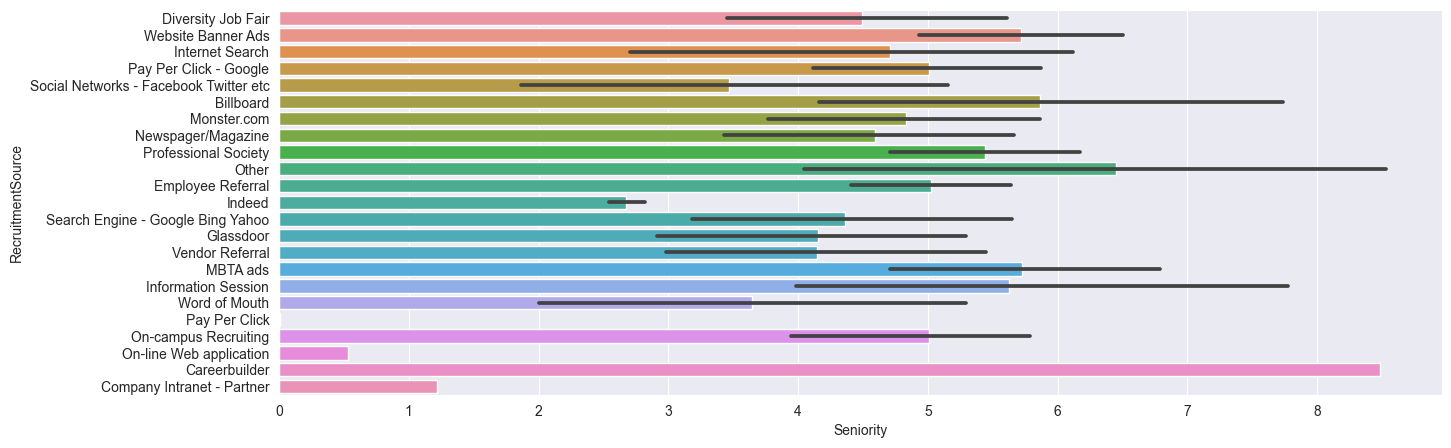

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(y='RecruitmentSource',x='Seniority',data=df)

<AxesSubplot: xlabel='count', ylabel='RecruitmentSource'>

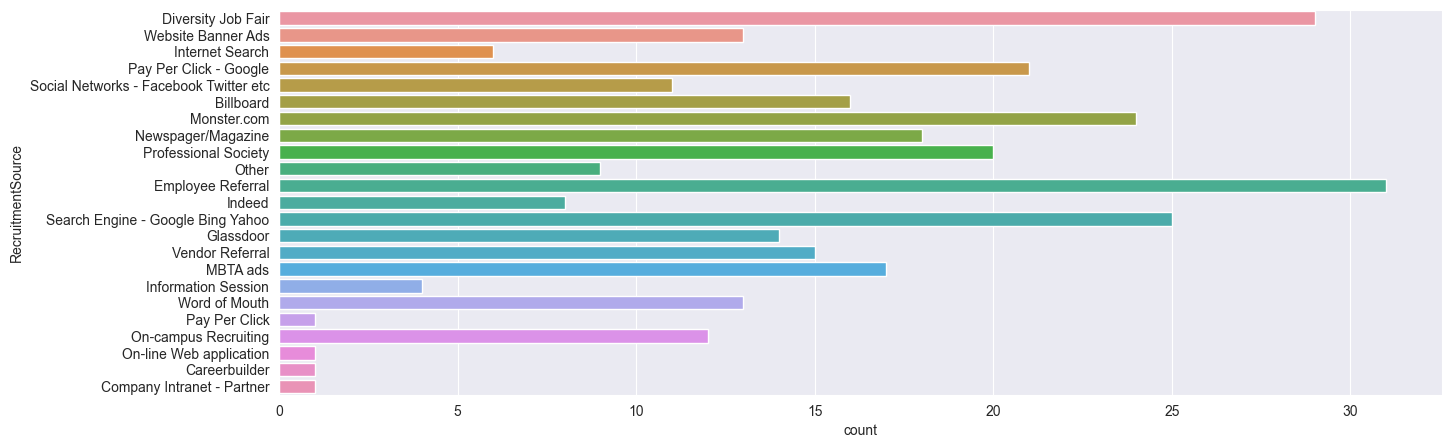

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y='RecruitmentSource',data=df)

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

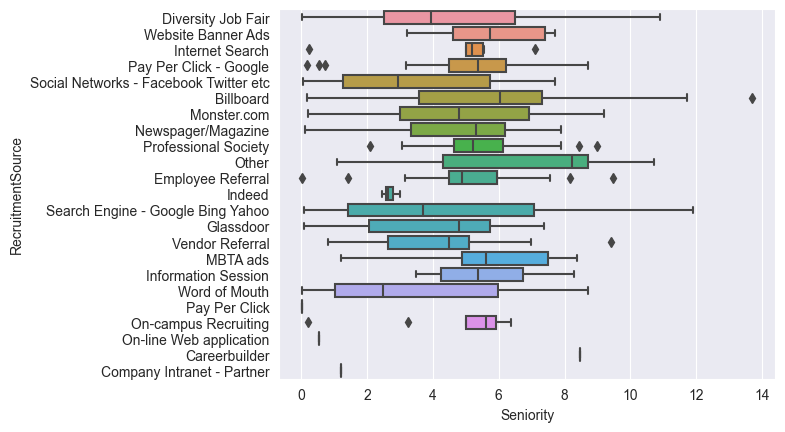

In [24]:
sns.boxplot(y='RecruitmentSource',x='Seniority',data=df)

odp

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

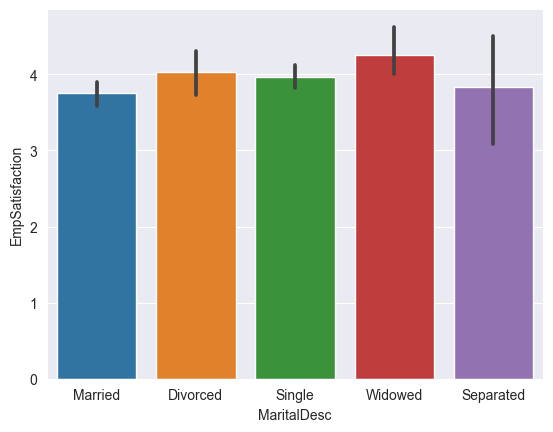

In [25]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

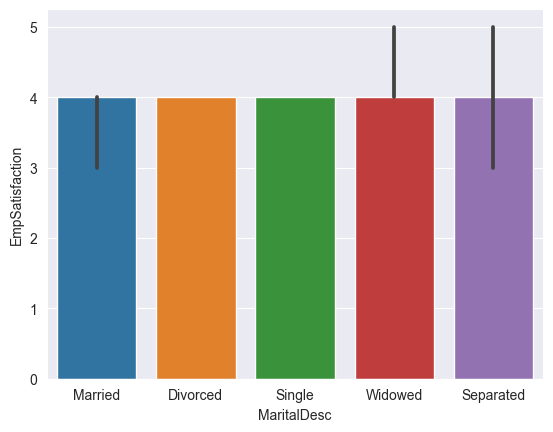

In [26]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df,estimator=np.median)

<AxesSubplot: xlabel='MaritalDesc', ylabel='count'>

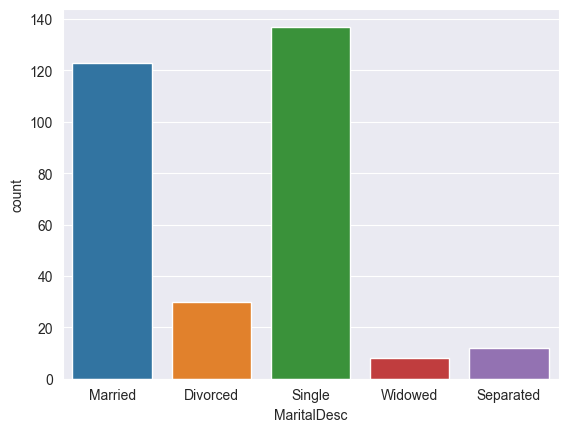

In [27]:
sns.countplot(x='MaritalDesc',data=df)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

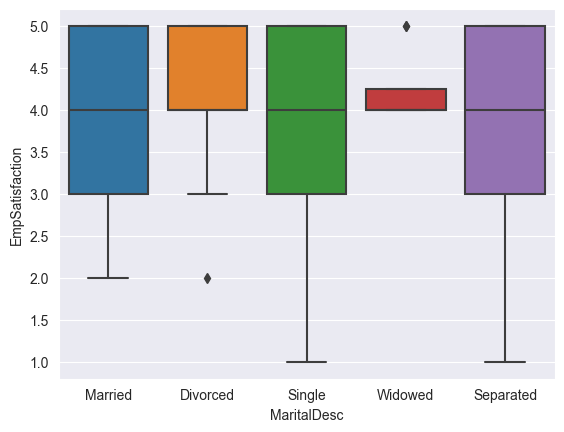

In [28]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

<AxesSubplot: xlabel='Age', ylabel='Count'>

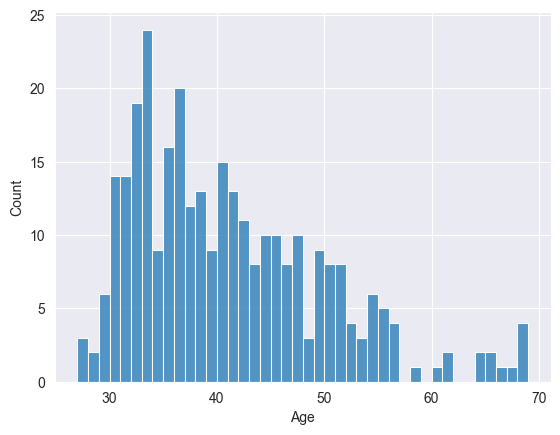

In [29]:
end_date = dt.datetime(2019,9,27)
def count_age(row):
    return ((end_date - row['DOB'])/np.timedelta64(1,'Y'))
df['Age'] = df.apply(lambda row: count_age(row),axis=1).round()
sns.set_style('darkgrid')
sns.histplot(df['Age'],binwidth=1)

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

<AxesSubplot: xlabel='Age', ylabel='SpecialProjectsCount'>

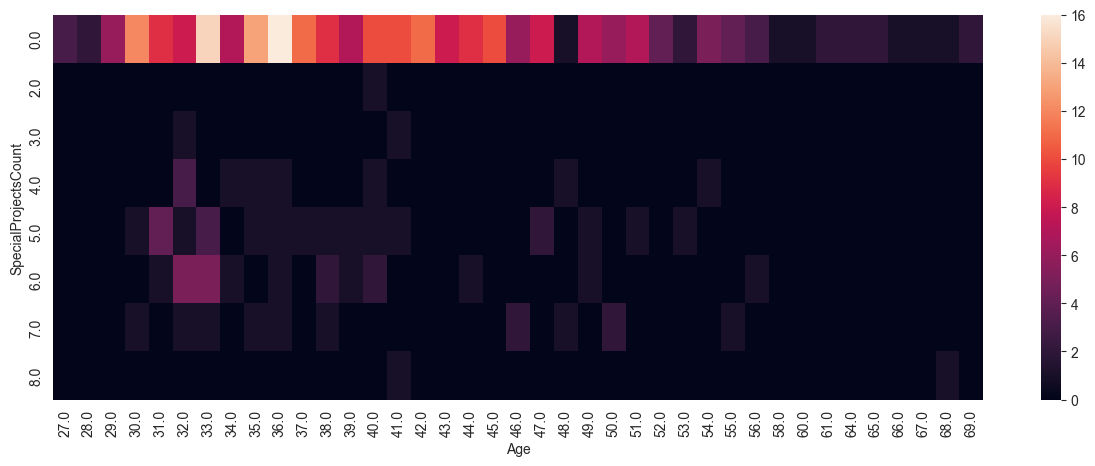

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['SpecialProjectsCount'],columns=df['Age'],values='EmpID',aggfunc='count').fillna(0))